# The Machine Learning Workflow

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Load Data

In [3]:
df = pd.read_csv('../data/RtmSimulation_kickstart.csv', index_col= 0)

In [4]:
df

,lai,wetness,treeSpecies,Sentinel_2A_492.4,Sentinel_2A_559.8,Sentinel_2A_664.6,Sentinel_2A_704.1,Sentinel_2A_740.5,Sentinel_2A_782.8,Sentinel_2A_832.8,...,w2491,w2492,w2493,w2494,w2495,w2496,w2497,w2498,w2499,w2500
id,,,,,,,,,,,,,,,,,,,,,
1,5.10,0.36,predominantly_pine,0.062092,0.131702,0.043197,0.177134,0.401750,0.458003,0.463287,...,0.037392,0.026100,0.033480,0.027219,0.033905,0.017797,0.038259,0.020111,0.027921,0.027520
2,5.34,0.47,predominantly_beech,0.052807,0.129987,0.043061,0.153641,0.407523,0.466853,0.477236,...,0.028002,0.030901,0.039650,0.029524,0.032461,0.030735,0.023527,0.029523,0.021542,0.026780
3,4.53,0.68,predominantly_pine,0.047937,0.139421,0.045780,0.157121,0.395428,0.441620,0.448626,...,0.015169,0.020155,0.025696,0.026504,0.028994,0.031195,0.025666,0.032225,0.016128,0.026495
4,2.10,0.80,predominantly_beech,0.045907,0.107761,0.033984,0.128237,0.341315,0.385277,0.382241,...,0.029487,0.031408,0.032888,0.029878,0.027617,0.034964,0.031996,0.032882,0.019543,0.121085
5,5.34,0.48,mixed,0.051712,0.136293,0.041502,0.167564,0.407460,0.454137,0.464966,...,0.024510,0.023754,0.026276,0.031367,0.039625,0.036997,0.022577,0.039619,0.031636,0.022230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,6.23,0.46,mixed,0.055358,0.025300,0.036994,0.484043,0.400706,0.471003,0.469821,...,0.022563,0.031964,0.031600,0.040257,0.037817,0.019517,0.027787,0.024043,0.033896,0.029702
997,5.32,0.92,mixed,0.047907,0.129982,0.034888,0.163465,0.388046,0.445944,0.458192,...,0.027160,0.020422,0.017963,0.020281,0.017511,0.016557,0.017318,0.026807,0.021946,0.010467
998,4.94,0.53,mixed,0.059756,0.130657,0.036825,0.162385,0.394375,0.464352,0.463945,...,0.027540,0.029444,0.033399,0.023800,0.029792,0.035015,0.027271,0.022583,0.024995,0.031479


In [21]:
df.treeSpecies.value_counts()

treeSpecies
mixed                  375
predominantly_pine     236
predominantly_beech    213
pine                    56
beech                   55
Name: count, dtype: int64

In [23]:
mapping_dict = {'mixed': 1,
                'predominantly_pine': 2,
                'predominantly_beech': 3,
                'pine': 4,
                'beech': 5}
df['treeSpecies_ord'] = df['treeSpecies'].map(mapping_dict)
df

,lai,wetness,treeSpecies,Sentinel_2A_492.4,Sentinel_2A_559.8,Sentinel_2A_664.6,Sentinel_2A_704.1,Sentinel_2A_740.5,Sentinel_2A_782.8,Sentinel_2A_832.8,...,w2492,w2493,w2494,w2495,w2496,w2497,w2498,w2499,w2500,treeSpecies_ord
id,,,,,,,,,,,,,,,,,,,,,
1,5.10,0.36,predominantly_pine,0.062092,0.131702,0.043197,0.177134,0.401750,0.458003,0.463287,...,0.026100,0.033480,0.027219,0.033905,0.017797,0.038259,0.020111,0.027921,0.027520,2
2,5.34,0.47,predominantly_beech,0.052807,0.129987,0.043061,0.153641,0.407523,0.466853,0.477236,...,0.030901,0.039650,0.029524,0.032461,0.030735,0.023527,0.029523,0.021542,0.026780,3
3,4.53,0.68,predominantly_pine,0.047937,0.139421,0.045780,0.157121,0.395428,0.441620,0.448626,...,0.020155,0.025696,0.026504,0.028994,0.031195,0.025666,0.032225,0.016128,0.026495,2
4,2.10,0.80,predominantly_beech,0.045907,0.107761,0.033984,0.128237,0.341315,0.385277,0.382241,...,0.031408,0.032888,0.029878,0.027617,0.034964,0.031996,0.032882,0.019543,0.121085,3
5,5.34,0.48,mixed,0.051712,0.136293,0.041502,0.167564,0.407460,0.454137,0.464966,...,0.023754,0.026276,0.031367,0.039625,0.036997,0.022577,0.039619,0.031636,0.022230,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.66,0.60,beech,0.047153,0.101292,0.037658,0.133554,0.328274,0.375413,0.385352,...,0.047624,0.050867,0.046374,0.050222,0.048430,0.040030,0.037228,0.042167,0.037879,5
996,6.23,0.46,mixed,0.055358,0.025300,0.036994,0.484043,0.400706,0.471003,0.469821,...,0.031964,0.031600,0.040257,0.037817,0.019517,0.027787,0.024043,0.033896,0.029702,1
997,5.32,0.92,mixed,0.047907,0.129982,0.034888,0.163465,0.388046,0.445944,0.458192,...,0.020422,0.017963,0.020281,0.017511,0.016557,0.017318,0.026807,0.021946,0.010467,1


#### Define target and features

In [28]:
df.drop('treeSpecies', axis=1, inplace=True)
df.dropna(inplace = True)
df.shape

(935, 2114)

In [81]:
y = df['lai']
X = df.iloc[:,1:]

#### Train-Test Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [50]:
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

SVR(kernel='linear')

In [54]:
y_pred = regressor.predict(X_train)

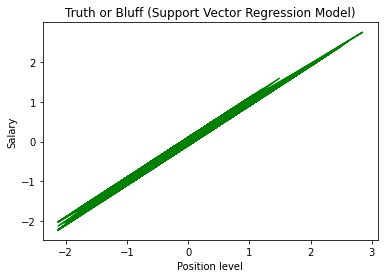

In [56]:
plt.scatter(X_train[, y_train, color = 'magenta')
plt.plot(y_train, regressor.predict(X_train), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Feature Engineering

## Modelling

In [83]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

## Hyperparameter Optimization

In [84]:
svr = SVR()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

In [85]:
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [86]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'C': 10, 'epsilon': 0.001, 'kernel': 'rbf'}


## Cross validation

In [91]:
best_svr = grid_search.best_estimator_
X_test_scaled = scaler_X.transform(X_test)
y_pred_scaled = best_svr.predict(X_test_scaled)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_pred_scaled.shape)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

(748, 2113)
(187, 2113)
(187,)
Mean Squared Error: 0.31236779363406825
R-squared: 0.9282478319798481


In [95]:
train_score = best_svr.score(X_train_scaled, y_train_scaled)
print(f'Trained data score', {train_score})

Trained data score {0.9949604599522467}


In [96]:
scores = cross_val_score(best_svr, X_train_scaled, y_train_scaled, cv=5)
print(f'Cross-validated R-squared scores: {scores}')

Cross-validated R-squared scores: [0.93195709 0.91364243 0.94832315 0.94967247 0.94637058]


In [65]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [66]:
y_pred = svr.predict(X_test)

In [74]:
X_test.shape[0].shape

AttributeError: 'int' object has no attribute 'shape'

In [72]:
y_test.shape

(187,)

In [69]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.12212660512344152
R-squared: 0.8934533960231725


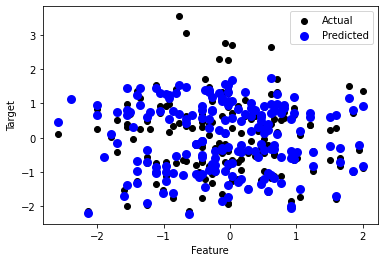

In [78]:
plt.scatter(X_test[:,0], y_test, color='black', label='Actual')
plt.scatter(X_test[:,0], y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()